#Metodos de ensamble voting

In [196]:
!pip install opendatasets
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [197]:
datasetlink = "https://www.kaggle.com/datasets/jeevannagaraj/indian-liver-patient-dataset"
od.download(datasetlink)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kidkeozz
Your Kaggle Key: ··········


100%|██████████| 7.65k/7.65k [00:00<00:00, 3.19MB/s]

In [198]:
import os
os.chdir("indian-liver-patient-dataset")
os.listdir()

['Indian Liver Patient Dataset (ILPD).csv']

**About Dataset**
**Data Set Information**
This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from test samples in North East of Andhra Pradesh, India. 'is_patient' is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.
Any patient whose age exceeded 89 is listed as being of age "90".

**Attribute Information**
* age Age of the patient
* gender Gender of the patient
* tot_bilirubin Total Bilirubin
* direct_bilirubin Direct Bilirubin
* alkphos Alkaline Phosphotase
* sgpt Alamine Aminotransferase
* sgot Aspartate Aminotransferase
* tot_proteins Total Protiens
* albumin Albumin
* ag_ratio Albumin and Globulin Ratio
* is_patient Selector field used to split the data into two sets (labeled by the experts)

**Acknowledgements**
The data set has been elicit from UCI Machine Learning Repository. My sincere thanks to them.

In [199]:
archivo = 'Indian Liver Patient Dataset (ILPD).csv'
df = pd.read_csv(archivo)
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [200]:
df.shape

(583, 11)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [202]:
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [203]:
df = df.dropna()
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

In [204]:
df = df.reset_index().drop(columns='index')
df

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
574,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
575,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
576,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
577,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [205]:
df.shape

(579, 11)

In [206]:
df.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [207]:
df.columns

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')

In [208]:
df_num = df.select_dtypes(include=['number']).drop(columns='is_patient')
df_clas = df['gender']

In [209]:
df_num.shape

(579, 9)

In [210]:
df_clas.shape

(579,)

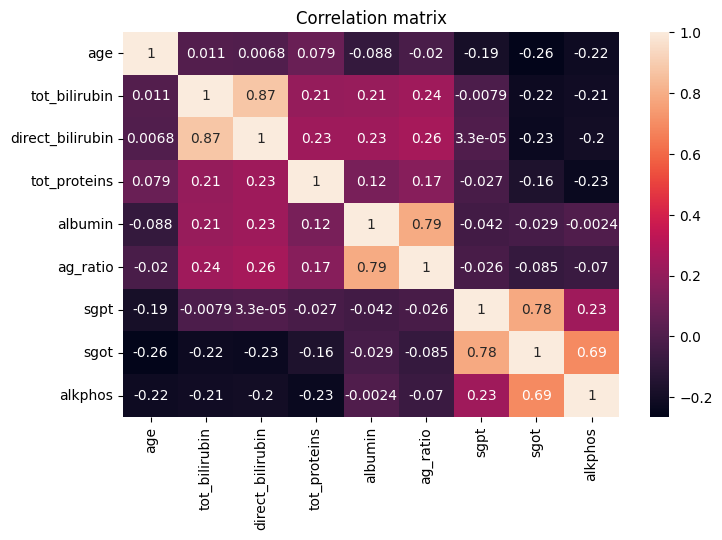

In [211]:
plt.figure(figsize=(8,5))
sns.heatmap(df_num.corr(), annot=True)
plt.title('Correlation matrix')
plt.show()

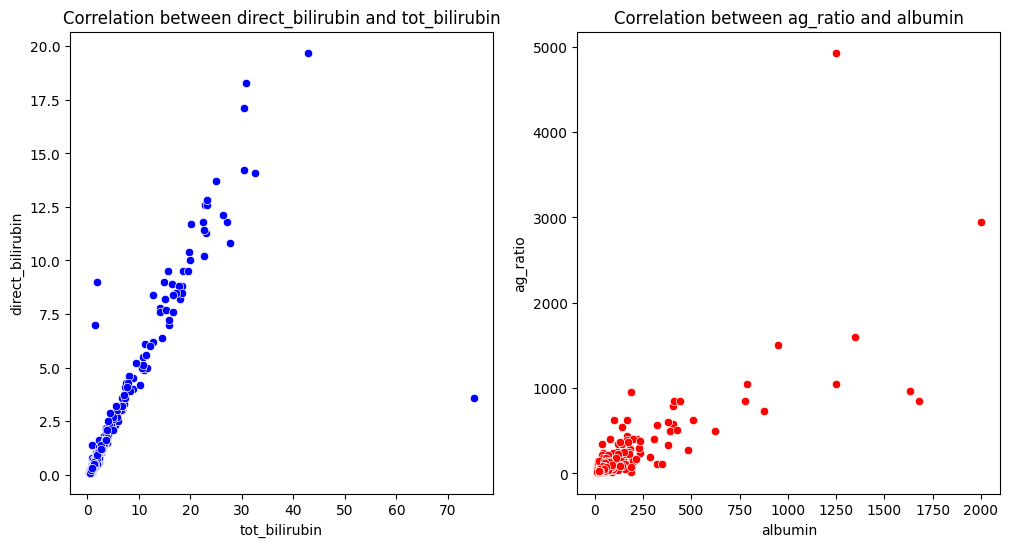

In [212]:
# Crear subgráficos en una fila
plt.figure(figsize=(12, 6))  # Tamaño total de la figura

plt.subplot(1, 2, 1)  # Subgráfico 1
sns.scatterplot(x= 'tot_bilirubin', y='direct_bilirubin', data=df_num, color='blue')
plt.title('Correlation between direct_bilirubin and tot_bilirubin')

plt.subplot(1, 2, 2)  # Subgráfico 2
sns.scatterplot(x= 'albumin', y='ag_ratio', data=df_num, color='red')
plt.title('Correlation between ag_ratio and albumin')

plt.show()

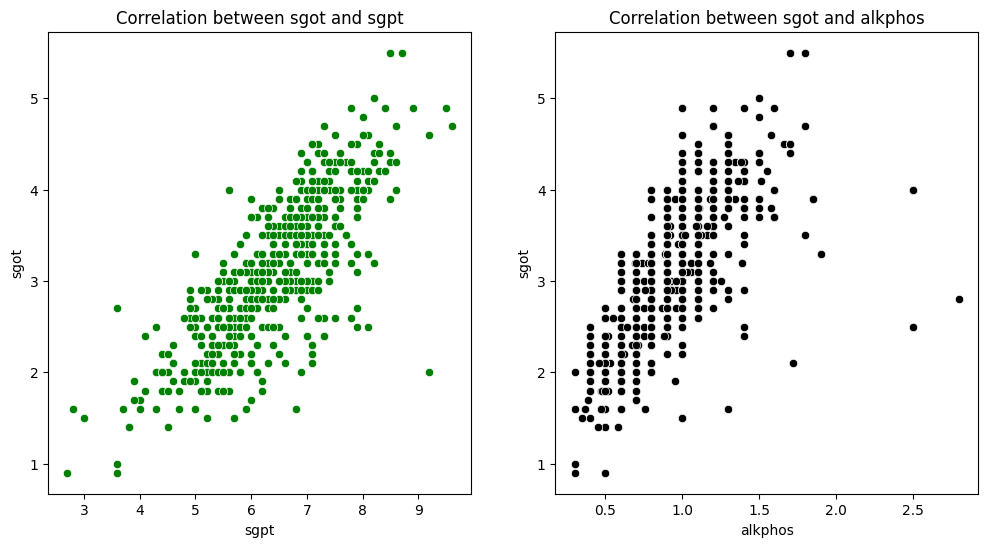

In [213]:
# Crear subgráficos en una fila
plt.figure(figsize=(12, 6))  # Tamaño total de la figura

plt.subplot(1, 2, 1)  # Subgráfico 1
sns.scatterplot(x= 'sgpt', y='sgot', data=df_num, color='green')
plt.title('Correlation between sgot and sgpt')

plt.subplot(1, 2, 2)  # Subgráfico 2
sns.scatterplot(x= 'alkphos', y='sgot', data=df_num, color='black')
plt.title('Correlation between sgot and alkphos')

plt.show()

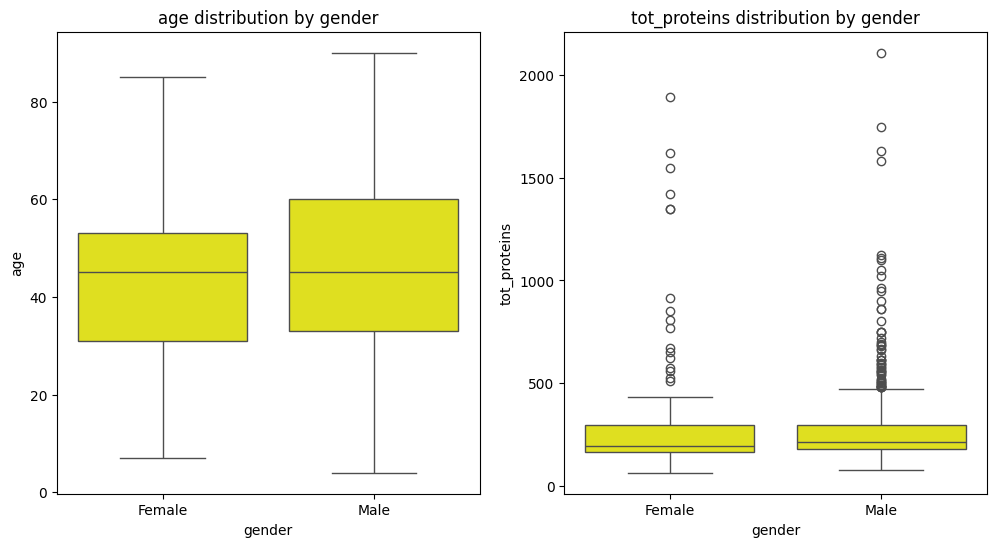

In [214]:
# Crear subgráficos en una fila
plt.figure(figsize=(12, 6))  # Tamaño total de la figura

plt.subplot(1, 2, 1)  # Subgráfico 1
sns.boxplot(x='gender', y='age', data=df, color='yellow')
plt.title('age distribution by gender')

plt.subplot(1, 2, 2)  # Subgráfico 2
sns.boxplot(x='gender', y='tot_proteins', data=df, color='yellow')
plt.title('tot_proteins distribution by gender')

plt.show()

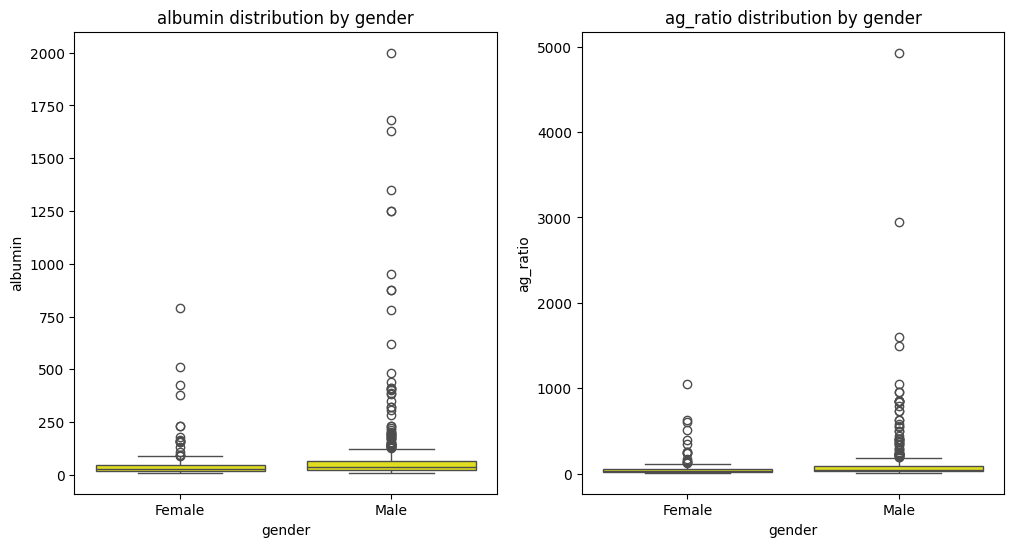

In [215]:
# Crear subgráficos en una fila
plt.figure(figsize=(12, 6))  # Tamaño total de la figura

plt.subplot(1, 2, 1)  # Subgráfico 1
sns.boxplot(x='gender', y='albumin', data=df, color='yellow')
plt.title('albumin distribution by gender')

plt.subplot(1, 2, 2)  # Subgráfico 2
sns.boxplot(x='gender', y='ag_ratio', data=df, color='yellow')
plt.title('ag_ratio distribution by gender')

plt.show()

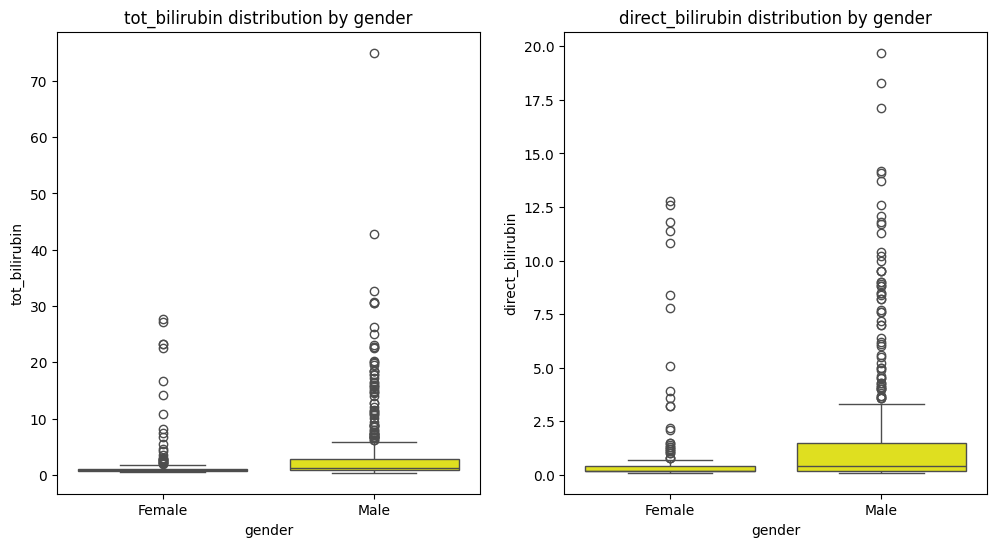

In [216]:
# Crear subgráficos en una fila
plt.figure(figsize=(12, 6))  # Tamaño total de la figura

plt.subplot(1, 2, 1)  # Subgráfico 1
sns.boxplot(x='gender', y='tot_bilirubin', data=df, color='yellow')
plt.title('tot_bilirubin distribution by gender')

plt.subplot(1, 2, 2)  # Subgráfico 2
sns.boxplot(x='gender', y='direct_bilirubin', data=df, color='yellow')
plt.title('direct_bilirubin distribution by gender')

plt.show()

In [217]:
from sklearn.preprocessing import RobustScaler
Rscaler = RobustScaler()
df_scaled = Rscaler.fit_transform(df_num)

In [218]:
df_nume_sca = pd.DataFrame(df_scaled, columns=df_num.columns)

In [219]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
df_clean = pd.concat([df_nume_sca, df_clas], axis=1)
df_clean['gender'] =Encoder.fit_transform(df_clean['gender'])
df_clean

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,gender
0,0.80,-0.166667,-0.181818,-0.171429,-0.500000,-0.387097,0.142857,0.166667,-0.075,0
1,0.68,5.500000,4.727273,4.008163,0.763158,0.935484,0.642857,0.083333,-0.475,1
2,0.68,3.500000,3.454545,2.302041,0.657895,0.419355,0.285714,0.166667,-0.100,1
3,0.52,0.000000,0.090909,-0.212245,-0.552632,-0.354839,0.142857,0.250000,0.175,1
4,1.08,1.611111,1.545455,-0.106122,-0.210526,0.274194,0.500000,-0.583333,-1.325,1
...,...,...,...,...,...,...,...,...,...,...
574,0.60,-0.277778,-0.181818,2.383673,-0.394737,-0.129032,-0.500000,-1.250000,-1.400,1
575,-0.20,-0.222222,-0.181818,-0.897959,0.000000,-0.177419,-0.428571,0.083333,0.425,1
576,0.28,-0.111111,-0.090909,0.302041,0.342105,0.112903,-0.142857,0.083333,0.175,1
577,-0.56,0.166667,0.181818,-0.195918,-0.157895,-0.161290,0.142857,0.250000,0.175,1


In [220]:
X = df_clean
y = df['is_patient']

In [221]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

In [222]:
#mejorar los parametetros para ver si se puede obtener un mayor resultado

In [223]:
from sklearn.model_selection import GridSearchCV
# Instantiate lr
lr = LogisticRegression()
lrparam_grid = {
    'penalty':['l1','l2'],
    'C' : [0.0001,0.001,0.01,0.1,1]
                        }

randomizer = GridSearchCV(lr, lrparam_grid, cv=5)
randomizer.fit(X_train,y_train)
print(randomizer.best_params_,randomizer.best_score_ )

{'C': 0.0001, 'penalty': 'l2'} 0.7160493827160493


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [224]:
# Instantiate knn
knn = KNN()
knnparam_grid = {
    'n_neighbors':np.arange(5,30,3),
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p':[1,2]
                        }

randomizer = GridSearchCV(knn, knnparam_grid, cv=5)
randomizer.fit(X_train,y_train)
print(randomizer.best_params_,randomizer.best_score_ )

{'algorithm': 'auto', 'n_neighbors': 14, 'p': 1} 0.7308641975308643


In [225]:
# Instantiate dt
dtc = DecisionTreeClassifier()
dtcparam_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': np.arange(0.10,0.20,0.01)
                        }

randomizer = GridSearchCV(dtc, dtcparam_grid, cv=5)
randomizer.fit(X_train,y_train)
print(randomizer.best_params_,randomizer.best_score_ )

{'criterion': 'entropy', 'min_samples_leaf': 0.18999999999999995} 0.7234567901234568


In [226]:
SEED=42

# Instantiate lr
lr = LogisticRegression(C =0.0001, penalty = 'l2', random_state=SEED)

# Instantiate knn
knn = KNN(algorithm = 'auto', n_neighbors = 14, p= 1)

# Instantiate dt
dtc = DecisionTreeClassifier(criterion= 'entropy',min_samples_leaf=0.18999999999999995, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dtc)]

In [227]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:

    # Fit clf to the training set
    clf.fit(X_train, y_train)

    # Predict y_pred
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.713
K Nearest Neighbours : 0.690
Classification Tree : 0.718


In [228]:
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)

# Fit vc to the training set
vc.fit(X_train, y_train)

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.718
